In [10]:
import earthkit.data
from earthkit.plots.interactive import Chart
from earthkit.regrid import interpolate
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Polytope Example for Time Series
## Using data from AIFS Single

<div style="border:2px solid #f39c12; background-color:#fcf8e3; padding:10px; border-radius:5px;">
  <strong>⚠️ Warning: </strong> AIFS FDB only retains data for 3-5 days in the past.
</div>


In [11]:
request = {
    "class": "ai",
    "model": "aifs-single",
    "date": "-1",
    "expver": 1,
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "date": "-3", #three-five days of forecasts.
    "levtype": "sfc",
    "param": "165/167",
    "feature": {
        "type" : "timeseries",
        "points": [[50.74,7.10]],
        "axes": "step",
        "range": {"start" : 0, "end": 48}
    }
}
data = earthkit.data.from_source(
    "polytope", "ecmwf-mars", request, address="polytope.ecmwf.int", stream=False)

2025-10-14 20:49:01 - INFO - Key read from /home/maes/.polytopeapirc
2025-10-14 20:49:01 - INFO - Sending request...
{'request': 'class: ai\n'
            "date: '-3'\n"
            'expver: 1\n'
            'feature:\n'
            '  axes: step\n'
            '  points:\n'
            '  - - 50.74\n'
            '    - 7.1\n'
            '  range:\n'
            '    end: 48\n'
            '    start: 0\n'
            '  type: timeseries\n'
            'levtype: sfc\n'
            'model: aifs-single\n'
            'param: 165/167\n'
            'stream: oper\n'
            "time: '00'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-10-14 20:49:01 - INFO - Polytope user key found in session cache for user maes
2025-10-14 20:49:02 - INFO - Request accepted. Please poll ./49725006-7374-4f1a-b0f9-2c6e1caff34c for status
2025-10-14 20:49:02 - INFO - Polytope user key found in session cache for user maes
2025-10-14 20:49:02 - INFO - Checking request status (49725006-7374-4f1a-b0f9-

In [123]:
# data.to_target("file", "data.covjson")

In [101]:
# data = earthkit.data.from_source("file", "data.covjson")

In [12]:
dx = data.to_xarray()
dx

<xarray.Dataset> Size: 328B
Dimensions:    (latitude: 1, longitude: 1, levelist: 1, number: 1, datetime: 1,
                t: 9)
Coordinates:
  * latitude   (latitude) float64 8B 50.73
  * longitude  (longitude) float64 8B 7.083
  * levelist   (levelist) int64 8B 0
  * number     (number) int64 8B 0
  * datetime   (datetime) <U20 80B '2025-10-11T00:00:00Z'
  * t          (t) datetime64[ns] 72B 2025-10-11 ... 2025-10-13
Data variables:
    10u        (latitude, longitude, levelist, number, datetime, t) float64 72B ...
    2t         (latitude, longitude, levelist, number, datetime, t) float64 72B ...
Attributes:
    class:          ai
    Forecast date:  2025-10-11T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    model:          aifs-single
    stream:         oper
    type:           fc
    number:         0

In [13]:
dx['2t'] = dx['2t'] - 273.15
dx['2t'].attrs['units'] = '°C'
dx

<xarray.Dataset> Size: 328B
Dimensions:    (latitude: 1, longitude: 1, levelist: 1, number: 1, datetime: 1,
                t: 9)
Coordinates:
  * latitude   (latitude) float64 8B 50.73
  * longitude  (longitude) float64 8B 7.083
  * levelist   (levelist) int64 8B 0
  * number     (number) int64 8B 0
  * datetime   (datetime) <U20 80B '2025-10-11T00:00:00Z'
  * t          (t) datetime64[ns] 72B 2025-10-11 ... 2025-10-13
Data variables:
    10u        (latitude, longitude, levelist, number, datetime, t) float64 72B ...
    2t         (latitude, longitude, levelist, number, datetime, t) float64 72B ...
Attributes:
    class:          ai
    Forecast date:  2025-10-11T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    model:          aifs-single
    stream:         oper
    type:           fc
    number:         0

In [14]:
TIME_FREQUENCY = "6h"

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at 50.74°N, 7.10°E (Bonn)")

chart.line(
    dx,
    line_color='grey',
    time_frequency=TIME_FREQUENCY,
)

chart.show()

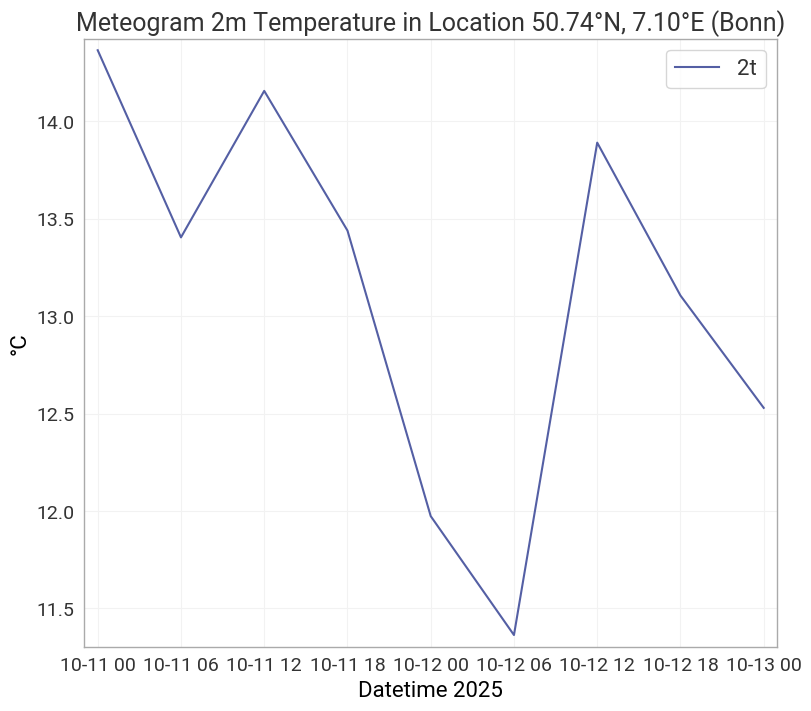

In [15]:
data_1d = dx["2t"].squeeze()


import matplotlib.pyplot as plt
plt.rcParams.update({
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
})

# Create subplot
sub = earthkit.plots.Subplot()

sub.line(x=data_1d["t"].values, y=data_1d.values, label="2t")
sub.title(
    "Meteogram 2m Temperature in Location 50.74°N, 7.10°E (Bonn)",
     fontsize=18
)

# Access the underlying Matplotlib Axes (property is `ax`)
ax = sub.ax

# Axis titles
ax.set_xlabel("Datetime 2025", fontsize=16)
ax.set_ylabel("°C", fontsize=16)

# Standard Matplotlib legend
ax.legend(loc="best", fontsize=16)
sub.show()
